File 01-descriptive.py


Michel Bierlaire

Wed Aug 7 18:10:49 2024




Before using a data file for modeling purposes, it is important to
collect some information about its content. The objective of this lab is to extract some descriptive statistics
from a database with choice data using the package `pandas`.

We introduce some examples using the file `swissmetro.dat`. 

We first import `pandas`

In [1]:
import pandas as pd
from IPython.core.display_functions import display
from matplotlib import pyplot as plt


The data file is available at
[http://transp-or.epfl.ch/data/swissmetro.dat](http://transp-or.epfl.ch/data/swissmetro.dat).

The
description of the columns of the file is
available [here](http://transp-or.epfl.ch/documents/technicalReports/CS_SwissmetroDescription.pdf).

Read the file. For future laboratories, it is advised to download the file and store it on your local disk. Here,
we will obtain it from its URL.

In [2]:
data_file = 'http://transp-or.epfl.ch/data/swissmetro.dat'
swissmetro = pd.read_csv(data_file, sep='\t')
display(swissmetro)



,GROUP,SURVEY,SP,ID,PURPOSE,FIRST,TICKET,WHO,LUGGAGE,AGE,...,TRAIN_TT,TRAIN_CO,TRAIN_HE,SM_TT,SM_CO,SM_HE,SM_SEATS,CAR_TT,CAR_CO,CHOICE
0,2,0,1,1,1,0,1,1,0,3,...,112,48,120,63,52,20,0,117,65,2
1,2,0,1,1,1,0,1,1,0,3,...,103,48,30,60,49,10,0,117,84,2
2,2,0,1,1,1,0,1,1,0,3,...,130,48,60,67,58,30,0,117,52,2
3,2,0,1,1,1,0,1,1,0,3,...,103,40,30,63,52,20,0,72,52,2
4,2,0,1,1,1,0,1,1,0,3,...,130,36,60,63,42,20,0,90,84,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10723,3,1,1,1192,4,1,7,1,0,5,...,148,13,30,93,17,30,0,156,56,2
10724,3,1,1,1192,4,1,7,1,0,5,...,148,12,30,96,16,10,0,96,70,3
10725,3,1,1,1192,4,1,7,1,0,5,...,148,16,60,93,16,20,0,96,56,3
10726,3,1,1,1192,4,1,7,1,0,5,...,178,16,30,96,17,30,0,96,91,2


- The database contains 10728 rows of data, corresponding to each
observation in the sample.
- It contains 28 columns, corresponding to
the available variables.

The list of columns is reported below.

In [3]:
display(swissmetro.columns)


Index(['GROUP', 'SURVEY', 'SP', 'ID', 'PURPOSE', 'FIRST', 'TICKET', 'WHO',
       'LUGGAGE', 'AGE', 'MALE', 'INCOME', 'GA', 'ORIGIN', 'DEST', 'TRAIN_AV',
       'CAR_AV', 'SM_AV', 'TRAIN_TT', 'TRAIN_CO', 'TRAIN_HE', 'SM_TT', 'SM_CO',
       'SM_HE', 'SM_SEATS', 'CAR_TT', 'CAR_CO', 'CHOICE'],
      dtype='object')

If we look at the column `ID`, we observe that it contains 1192
unique values, corresponding to the 1192 individuals that have
participated in the survey. Each of these respondents was asked to
perform 9 choice exercises, for a total of 10728 observations (the
number of rows in the file).

In [4]:

display(swissmetro['ID'].unique())


array([   1,    2,    3, ..., 1190, 1191, 1192])

If we look at the column `PURPOSE`, corresponding to the trip
purpose, it contains a total of 9 unique values, numbered from 1 to
9. 

In [5]:
display(swissmetro['PURPOSE'].unique())


array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In order to understand better the distribution of these values, we
can calculate the frequency of each value, here sorted by decreasing
order of frequency.

In [6]:
display(swissmetro['PURPOSE'].value_counts())


PURPOSE
3    5193
4    2304
1    1575
2    1278
5     144
7     144
6      63
9      18
8       9
Name: count, dtype: int64

The histogram of this distribution is also useful.

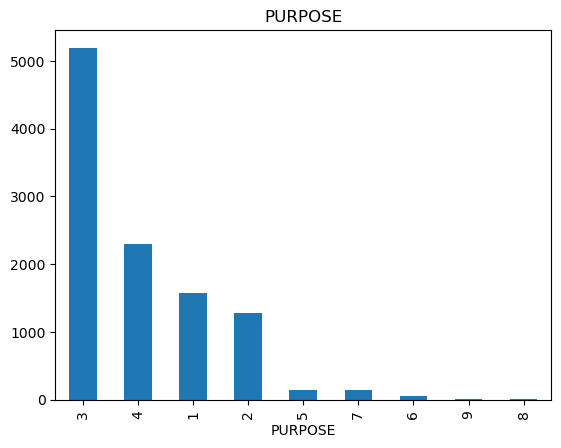

In [7]:
_ = swissmetro['PURPOSE'].value_counts().plot(title='PURPOSE', kind='bar')
plt.show()


We do the same for the `CHOICE`variable.

In [8]:
display(swissmetro['CHOICE'].value_counts())


CHOICE
2    6216
3    3080
1    1423
0       9
Name: count, dtype: int64

And the histogram...

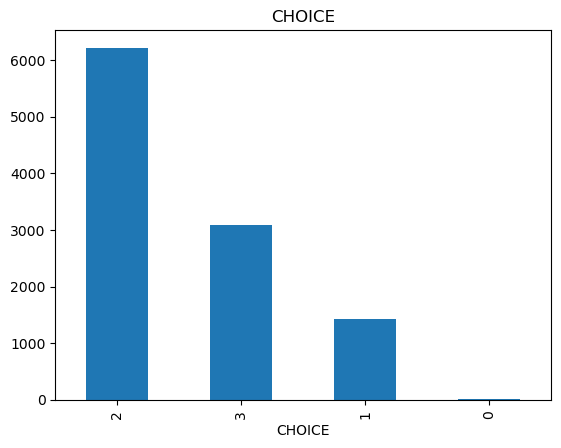

In [9]:
_ = swissmetro['CHOICE'].value_counts().plot(title='CHOICE', kind='bar')
plt.show()


If we look at the column `INCOME`, we note that it is also
coded as a discrete variables, with 5 unique values, distributed as follows.

In [10]:
swissmetro['INCOME'].value_counts()



INCOME
3    4041
2    3744
1    1719
4     918
0     306
Name: count, dtype: int64

And we can represent the histogram using horizontal bars. 

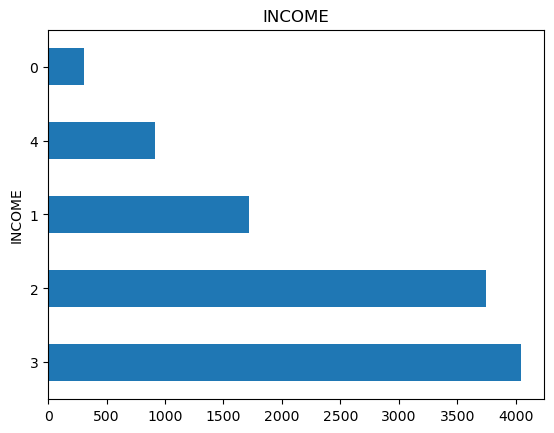

In [11]:
_ = swissmetro['INCOME'].value_counts().plot(title='INCOME', kind='barh')
plt.show()


If we look at a continuous variable, such as `TRAIN_TT`,
representing the travel time by train, we are interested in statistics
such as the mean, the standard deviation, the minimum and maximum
values, as well as some quantiles.

In [12]:

display(swissmetro['TRAIN_TT'].describe())



count    10728.000000
mean       166.626025
std         77.353284
min         31.000000
25%        109.000000
50%        157.000000
75%        209.000000
max       1049.000000
Name: TRAIN_TT, dtype: float64

It is interesting to note that 75\% of the values are lesser or equal
to 209, while the maximum is 1049. 

A histogram can also be plotted.

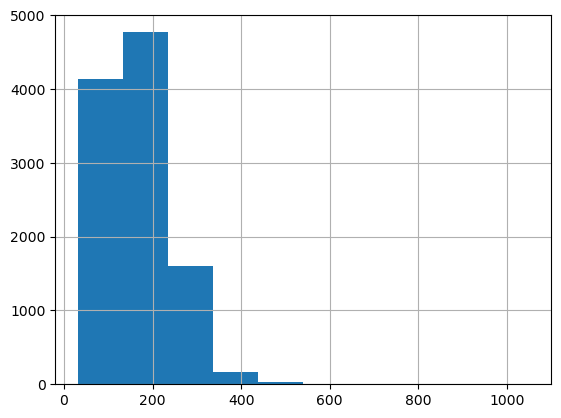

In [13]:
_ = swissmetro['TRAIN_TT'].hist()



A similar analysis of the variable `SM_CO` provides the
following statistics.

count    10728.000000
mean       670.340697
std       1441.594614
min          6.000000
25%         70.000000
50%        111.000000
75%        209.000000
max       6720.000000
Name: SM_CO, dtype: float64

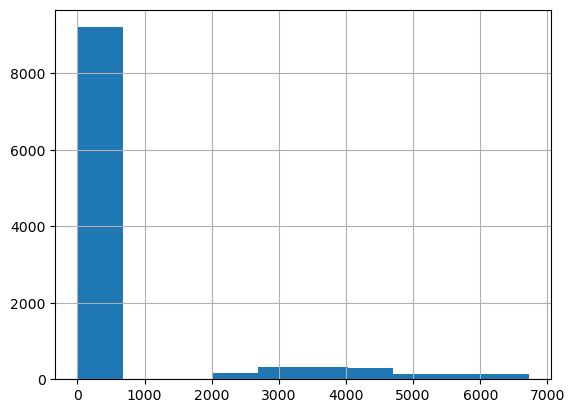

In [14]:
display(swissmetro['SM_CO'].describe())
_ = swissmetro['SM_CO'].hist()
plt.show()


It may be made more readable by using a log scale.

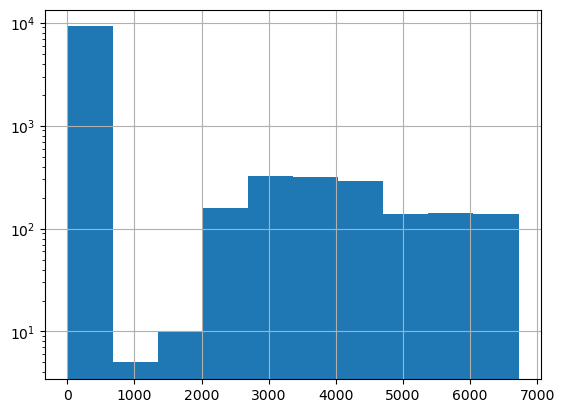

In [15]:
_ = swissmetro['SM_CO'].hist(log=True)
plt.show()


It is also interesting to investigate the correlation between
two variables.

In [16]:
display(swissmetro['TRAIN_TT'].corr(swissmetro['TRAIN_CO']))



np.float64(-0.21674740626019556)

The correlation can also be illustrated using a scatter plot.

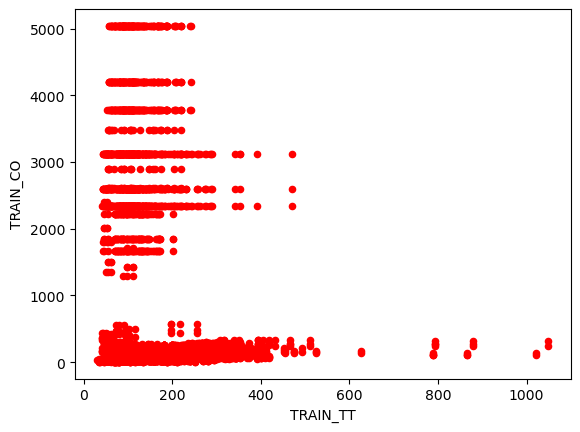

In [17]:
_ = swissmetro.plot(kind='scatter', x='TRAIN_TT', y='TRAIN_CO', color='r')
plt.show()


Now, you are asked to perform a similar analysis of the file
[http://transp-or.epfl.ch/data/optima.dat](http://transp-or.epfl.ch/data/optima.dat). The description of the data is
available [here](http://transp-or.epfl.ch/documents/technicalReports/CS_OptimaDescription.pdf).